In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



In [4]:
df = pd.read_csv("health_insurance.csv")


In [5]:
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [6]:
df.describe()

,age,bmi,bp,children,medical_cost
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,42.280769,31.581396,147.774615,1.104615,13243.214691
std,14.024847,6.356487,11.221987,1.208697,12060.371167
min,19.000000,15.290000,120.000000,0.000000,1121.873900
25%,29.750000,27.207500,140.000000,0.000000,4760.155950
50%,42.000000,31.645000,150.000000,1.000000,9388.753650
75%,54.000000,35.488750,156.000000,2.000000,16579.959053
max,69.000000,57.130000,178.000000,5.000000,63770.428010


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1300 non-null   int64  
 1   gender        1300 non-null   object 
 2   bmi           1300 non-null   float64
 3   bp            1300 non-null   int64  
 4   children      1300 non-null   int64  
 5   region        1300 non-null   object 
 6   smoker        1300 non-null   object 
 7   medical_cost  1300 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 81.4+ KB


In [8]:
df.columns

Index(['age', 'gender', 'bmi', 'bp ', 'children', 'region', 'smoker',
       'medical_cost'],
      dtype='object')

In [9]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


In [10]:
df.tail()

,age,gender,bmi,bp,children,region,smoker,medical_cost
1295,54,F,30.97,143,3,southwest,non-smoker,10600.5483
1296,22,M,34.92,156,0,northeast,non-smoker,2205.9808
1297,21,M,34.85,145,0,southeast,non-smoker,1629.8335
1298,22,M,24.80,150,0,northwest,non-smoker,2007.9450
1299,63,M,33.07,159,0,northwest,smoker,29141.3603


In [11]:
df.shape

(1300, 8)

In [12]:
df.isna()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1295,False,False,False,False,False,False,False,False
1296,False,False,False,False,False,False,False,False
1297,False,False,False,False,False,False,False,False
1298,False,False,False,False,False,False,False,False


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520
...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,southwest,non-smoker,10600.54830
1296,22,M,34.920,156,0,northeast,non-smoker,2205.98080
1297,21,M,34.850,145,0,southeast,non-smoker,1629.83350
1298,22,M,24.800,150,0,northwest,non-smoker,2007.94500


In [16]:
print('Shape:', df.shape)
print('Rows:', df.shape[0])
print("Columns:", df.shape[1])

Shape: (1300, 8)
Rows: 1300
Columns: 8


<Axes: xlabel='age', ylabel='Count'>

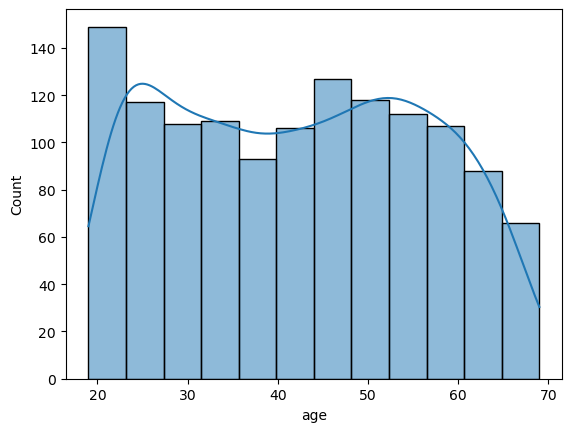

In [17]:
sns.histplot(df['age'], kde = True)

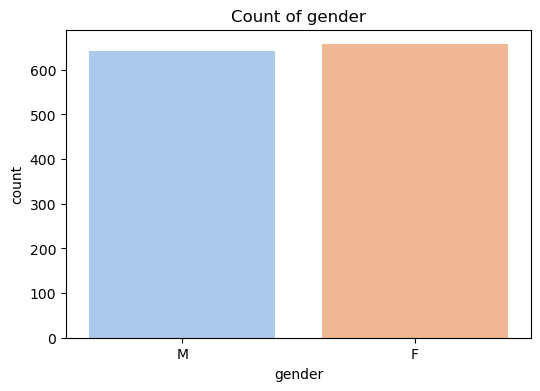

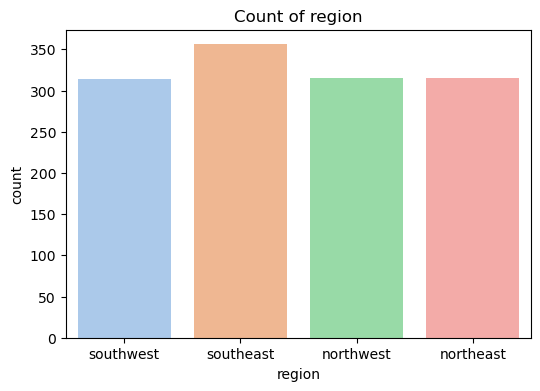

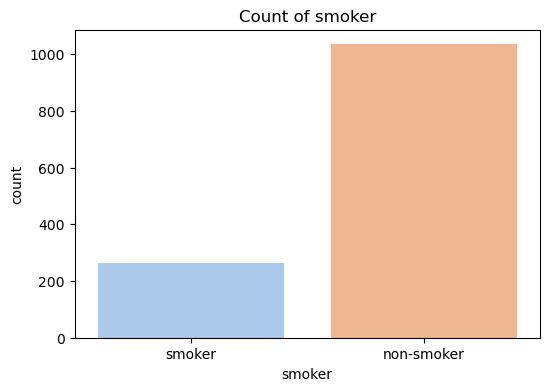

In [32]:
#Count Plots for Categorical Columns
categorical_cols = ['gender', 'region', 'smoker']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette="pastel")
    plt.title(f"Count of {col}", fontsize=12)
    plt.show()


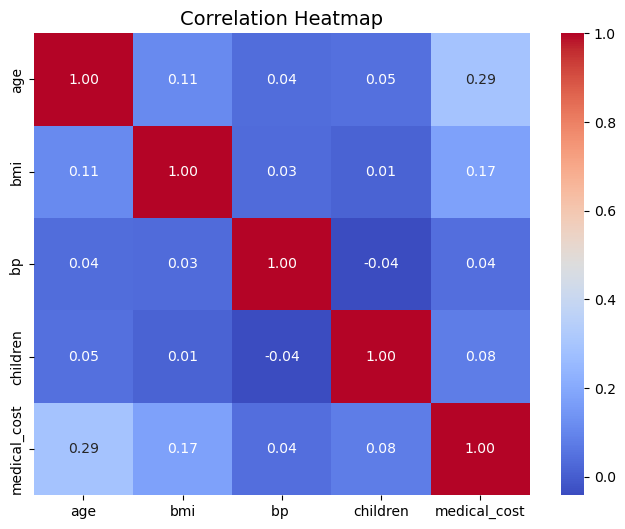

In [23]:
 #Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [24]:
#Encode Categorical Data

le = LabelEncoder()
df_encoded = df.copy()
for col in ['gender', 'region', 'smoker']:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [25]:
# 🔹Train-Test Split

X = df_encoded.drop('medical_cost', axis=1)
y = df_encoded['medical_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
#Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [28]:
 # Model Evaluation

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Performance:")
print("R² Score:", round(r2, 3))
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))


Model Performance:
R² Score: 0.712
MAE: 4252.78
RMSE: 6485.34


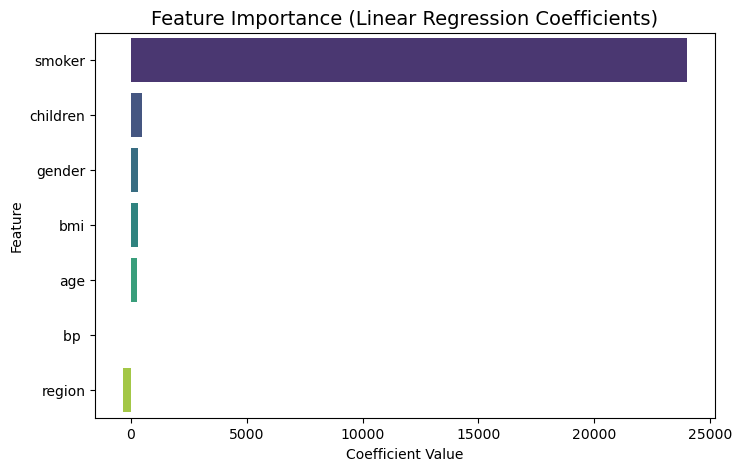

In [29]:
# Feature Importance Plot

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette="viridis")
plt.title("Feature Importance (Linear Regression Coefficients)", fontsize=14)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


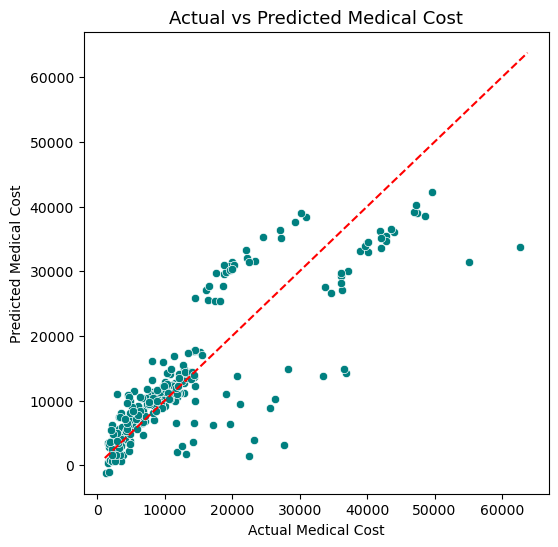

In [30]:
#Actual vs Predicted Plot

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal")
plt.xlabel("Actual Medical Cost")
plt.ylabel("Predicted Medical Cost")
plt.title("Actual vs Predicted Medical Cost", fontsize=13)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()
